In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('demand.csv')

In [3]:
df.head()

,Unnamed: 0,Demand
0,2002-01-31,52.0
1,2002-02-28,37.0
2,2002-03-31,48.0
3,2002-04-30,56.0
4,2002-05-31,49.0


In [4]:
df = df.rename(columns={'Unnamed: 0':'Date'})

In [5]:
df = df.set_index('Date')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Demand,228.0,43.850877,7.122258,16.0,39.0,44.0,49.0,60.0


In [7]:
df.shape

(228, 1)

In [8]:
df.dtypes

Demand    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 2002-01-31 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Demand  228 non-null    float64
dtypes: float64(1)
memory usage: 3.6+ KB


In [10]:
df.isnull().sum()

Demand    0
dtype: int64

In [11]:
df.head()

,Demand
Date,
2002-01-31,52.0
2002-02-28,37.0
2002-03-31,48.0
2002-04-30,56.0
2002-05-31,49.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 2002-01-31 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Demand  228 non-null    float64
dtypes: float64(1)
memory usage: 3.6+ KB


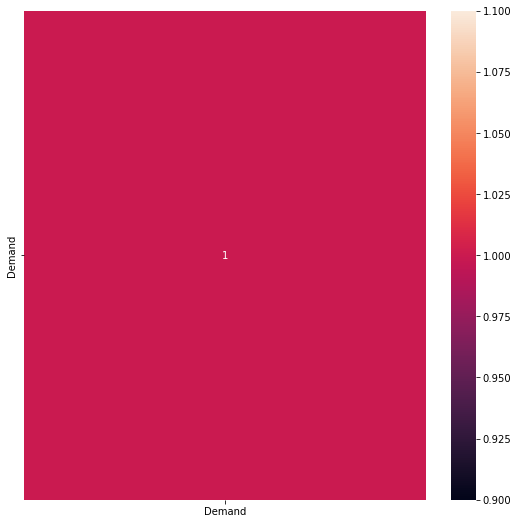

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

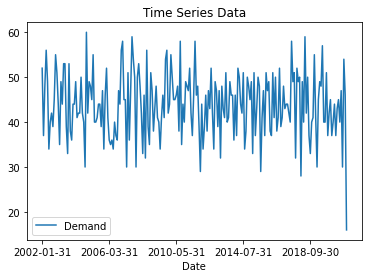

In [15]:
df.plot(title='Time Series Data')
plt.show()

## Time Series Decomposition
Decompose the time series into trend, seasonal, and residual components.

In [16]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=228, freq=None)

<Figure size 864x576 with 0 Axes>

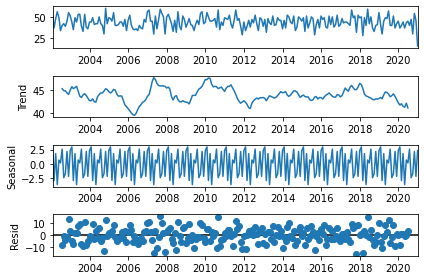

In [17]:
plt.figure(figsize = (12,8))

# Decompose the time series data
decomposition = seasonal_decompose(df, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

## Test for Stationarity
Use the Augmented Dickey-Fuller (ADF) test to determine if the time series is stationary.

# Perform the Augmented Dickey-Fuller test
result = adfuller(df)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

## Differencing:
Differencing involves computing the difference between consecutive observations in the time series. This can remove trends or seasonal patterns, making the data stationary.

df_diff = df.diff().dropna()

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

## Transformation:
Transformation techniques such as logarithmic transformation or square root transformation can stabilize the variance in the data, making it more stationary.

df_tf = np.log(df).dropna()

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_tf)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

## Seasonal Differencing:
If your data exhibits seasonal patterns, you can compute the difference between an observation and the corresponding observation from the previous season to remove seasonality.

# Define the seasonal lag
seasonal_lag = 12   # For monthly data with yearly seasonality
df_sdf = df.diff(periods=seasonal_lag).dropna()

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_sdf)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

# Check the number of dimensions of time_series_data
print("Number of dimensions:", df.ndim)

## ARIMA Forecasting
Fit an ARIMA (AutoRegressive Integrated Moving Average) model to the time series and forecast future values.

C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


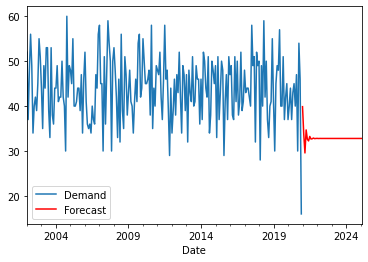

In [18]:
# Fit the ARIMA model - The time series is stationary
model = ARIMA(df, order=(2, 1, 0))  
arima_result = model.fit()

# Forecast the next 500 data points
forecast = arima_result.forecast(steps=50)

# Plot the original time series with the forecast
df.plot(label='Original Time Series')
forecast.plot(label='Forecast', color='red')
plt.legend()
plt.show()


## Smoothing
Smoothing helps reduce noise in a time series to better reveal underlying trends or patterns. Common techniques include rolling averages and exponential moving averages (EMA).

## Rolling Averages
A rolling average smooths a time series by averaging over a specified window.

# Apply a rolling average
df['rolling_avg'] = df.rolling(window=7).mean()  # 7-day rolling average

# Plot the original time series with the rolling average
df.plot(title='Rolling Average Smoothing')
plt.show()

## Train-Test Split

In [19]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

## Build and Fit Model
#### One of the most common models for time series forecasting is the ARIMA model. Fit an ARIMA model to your training data.

In [20]:
model = ARIMA(train, order=(2, 1, 0))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                  182
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -632.404
Date:                Sun, 09 Jun 2024   AIC                           1270.808
Time:                        19:15:13   BIC                           1280.404
Sample:                    01-31-2002   HQIC                          1274.698
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6799      0.076     -8.942      0.000      -0.829      -0.531
ar.L2         -0.3538      0.078     -4.562      0.000      -0.506      -0.202
sigma2        63.2401      6.867      9.209      0.0

C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


## Make Predictions
#### Use the model to make predictions on the test set

In [21]:
start_index = test.index[0]
end_index = test.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index, dynamic=False)
predictions

2017-03-31    43.922949
2017-04-30    45.064276
2017-05-31    43.961840
2017-06-30    44.307579
2017-07-31    44.462525
2017-08-31    44.234876
2017-09-30    44.334830
2017-10-31    44.347409
2017-11-30    44.303498
2017-12-31    44.328901
2018-01-31    44.327164
2018-02-28    44.319358
2018-03-31    44.325280
2018-04-30    44.324016
2018-05-31    44.322780
2018-06-30    44.324067
2018-07-31    44.323629
2018-08-31    44.323472
2018-09-30    44.323734
2018-10-31    44.323611
2018-11-30    44.323602
2018-12-31    44.323652
2019-01-31    44.323621
2019-02-28    44.323624
2019-03-31    44.323633
2019-04-30    44.323626
2019-05-31    44.323628
2019-06-30    44.323629
2019-07-31    44.323627
2019-08-31    44.323628
2019-09-30    44.323628
2019-10-31    44.323628
2019-11-30    44.323628
2019-12-31    44.323628
2020-01-31    44.323628
2020-02-29    44.323628
2020-03-31    44.323628
2020-04-30    44.323628
2020-05-31    44.323628
2020-06-30    44.323628
2020-07-31    44.323628
2020-08-31    44

##  Evaluate model

In [22]:
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 70.37612726154441


In [23]:
np.sqrt(mse ) / np.mean(test)

Demand    0.194015
dtype: float64

In [24]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [25]:
mape(test,predictions)

0.1800320268148583

## Plot predictions

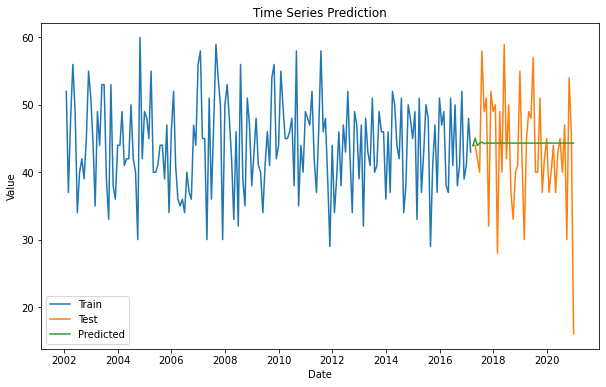

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Time Series Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [27]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(
    trend='add', seasonal='multiplicative', sp=12
)  
forecaster.fit(train)  
ExponentialSmoothing(...)
y_pred = forecaster.predict(fh=np.arange(len(test)))  
y_pred

C:\Users\Sabbath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,Demand
2017-02-28,42.127151
2017-03-31,45.644362
2017-04-30,40.548111
2017-05-31,43.725341
2017-06-30,42.526777
2017-07-31,45.767604
2017-08-31,41.277174
2017-09-30,41.471242
2017-10-31,47.763674
2017-11-30,40.810340


In [28]:
mape(test,y_pred)

0.19168639229826576

## RandomForest

In [29]:
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
forecaster.fit(train)
y_predrd = forecaster.predict(fh=np.arange(1,len(test)+1))

In [30]:
y_predrd 

,Demand
2017-03-31,43.22
2017-04-30,43.73
2017-05-31,43.27
2017-06-30,43.64
2017-07-31,45.40
2017-08-31,43.87
2017-09-30,43.87
2017-10-31,42.67
2017-11-30,44.58
2017-12-31,43.00


In [31]:
mape(test,y_predrd)

0.1756341099442035

##  LightGBM

In [39]:
from sktime.forecasting.compose import make_reduction
import lightgbm as lgb

# Create the forecaster with LightGBM
lightgbm_regressor = lgb.LGBMRegressor(n_estimators=10,learning_rate=0.05,num_leaves=31, boosting_type='gbdt', objective='regression')
forecaster1 = make_reduction(lgb.LGBMRegressor(),window_length=3,strategy="recursive")# Split the data into training and testing sets
forecaster1.fit(train)
y_predlg = forecaster.predict(fh = np.arange(1, len(test) + 1))

# Evaluate the model
mse = mean_squared_error(test, y_predlg)
print(f'Mean Squared Error: {mse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 179, number of used features: 3
[LightGBM] [Info] Start training from score 43.977654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [40]:
y_predlg

,Demand
2017-03-31,43.22
2017-04-30,43.73
2017-05-31,43.27
2017-06-30,43.64
2017-07-31,45.40
2017-08-31,43.87
2017-09-30,43.87
2017-10-31,42.67
2017-11-30,44.58
2017-12-31,43.00


In [41]:
mape(test,y_predlg)

0.1756341099442035